# **Analytical Model of Trap Limited Transport in Single-Carrier Devices**


**Low Voltage**

\begin{equation}
J_1 = q^{1 - 2l} \mu N_{\text{eff}} \left[ \frac{4 \pi^2 \epsilon_r \epsilon_0 k_B T}{N_t} \right]^l \frac{V}{L^{2l + 1}}
\end{equation}

\begin{equation}
J_1 = \alpha V
\end{equation}

**Intermediate Voltage**

\begin{equation}
J_2 = q^{1 - l} \mu N_{\text{eff}} \left[ \frac{\epsilon_r \epsilon_0 l}{N_t (l + 1)} \right]^l \left[ \frac{2l + 1}{l + 1} \right]^{l + 1} \frac{V^{l + 1}}{L^{2l + 1}}
\end{equation}

\begin{equation}
J_2 = \beta V^{l + 1}
\end{equation}

**High Voltage (Mott-Gurney Law)**

\begin{equation}
J_3 = \frac{9}{8} \mu \epsilon_r \epsilon_0 \theta \frac{V^2}{L^3}
\end{equation}

\begin{equation}
J_3 = \gamma V^2
\end{equation}






In [ ]:
#@title Defining Constant and Arbitrary Initial Values
#@markdown Here we are defining arbitrary (but realistic) values for variables whithin J_1,2,3
#Fundamental Constants
q = 1.60e-19 #C
epsilon_0 = 8.85e-10 #F/cm
k_b = 8.62e-5 #eV/K




#Initial Values
mu = 1 #cm^2/Vs
N_eff = 1e19 # per cm^3
epsilon_r = 10
T = 300 #K
N_t = 1e17
 # per cm^3
E_ch = 0.1 #eV
L = 1e-5 #cm
l = E_ch / (k_b * T)



print('l: ', l)

l:  3.8669760247486473


Alpha:  5.155671972055726e+19
Beta:  3.3669819361836335e+20
Gamma:  9956249.999999998


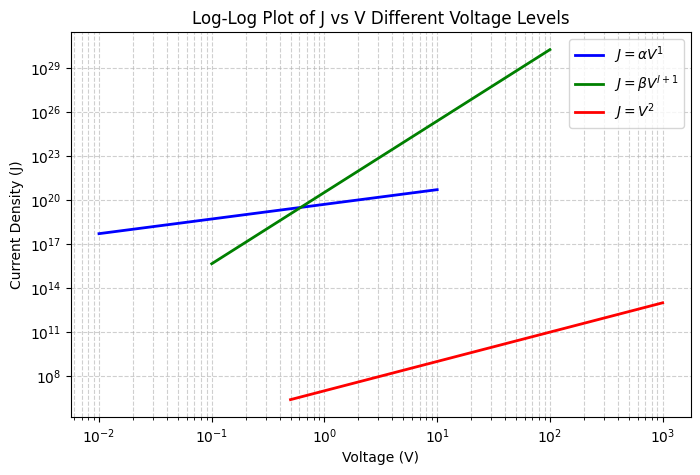

In [ ]:
#@title Plotting J_1, J_2, and J_3

#@markdown We now calculate alpha, beta and gamma value, then plot J_1, J_2, and J_3 on a log-log scale. A discrepency is noticed compared to predictions for the functions behavior.

import numpy as np
import matplotlib.pyplot as plt

alpha = (np.power(q, 1-2*l) * mu * N_eff * np.power(((4 * (np.pi**2) * epsilon_r * epsilon_0 * k_b * T*q) / N_t), l) * (1/ np.power(L, (2*l + 1))))
print("Alpha: ",alpha)

beta = (np.power(q, 1 - l) * mu * N_eff * np.power(((epsilon_r * epsilon_0 * l) / (N_t*(l+1))),l) * np.power((2*l+1)/(l+1),l+1)* (1/ np.power(L, (2*l + 1))))
print("Beta: ",beta)

theta=1
gamma= (9/8)*mu*epsilon_r*epsilon_0*theta*(1/np.power(L,3))
print("Gamma: ", gamma)

#Votage Ranges
V1 = np.linspace(0.01, 10, 100)
V2 = np.linspace(0.1, 100, 100)
V3 = np.linspace(0.5, 1000, 100)

#J functions
J1 = alpha*(V1)
J2 = beta*(V2**(l+1))
J3 = gamma*(V3**2)

# Plot the functions on log-log scale
plt.figure(figsize=(8, 5))
plt.loglog(V1, J1, label=r'$J = αV^1$', color='b', linewidth=2)
plt.loglog(V2, J2, label=r'$J = βV^{l+1}$', color='g', linewidth=2)
plt.loglog(V3, J3, label=r'$J = V^2$', color='r', linewidth=2)

# Labels, title, and grid
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (J)")
plt.title("Log-Log Plot of J vs V Different Voltage Levels")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

Scaling Voltage:  0.6155346499476572
Scaling Factor:  1.188674704627837e-13
Alpha:  6128416.858541357
Beta:  40022462.58480343
Gamma:  9956249.999999998
mu_Alpha,Beta:  1.188674704627837e-13


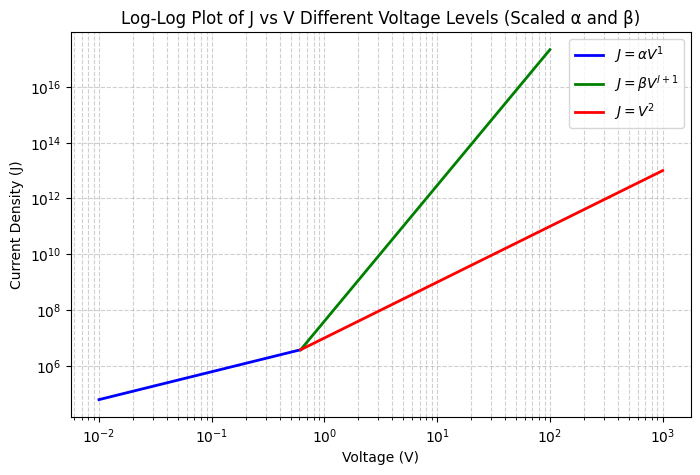

In [ ]:
#@title Defining and Integraiting Scaling Factor into J_1, J_2, and J_3
#@markdown It may make sense for J_1 and J_2 to have a different charge carrier mobility value then J_3. To account for this we can find a scaling factor value in which the functions all intersect. Plotting the functions with the introduced sacling factor, J_1,2,3 now show a more valid behavior.
scaling_voltage = (alpha / beta) ** (1 / l)
scaling_factor = (gamma * (scaling_voltage ** 2)) / (beta * (scaling_voltage ** (l + 1)))
scaling_factor=1.188674704627837e-13
print("Scaling Voltage: ", scaling_voltage)
print("Scaling Factor: ", scaling_factor)

alpha_new = (np.power(q, 1-2*l) * mu * scaling_factor * N_eff * np.power(((4 * (np.pi**2) * epsilon_r * epsilon_0 * k_b * T*q) / N_t), l) * (1/ np.power(L, (2*l + 1))))
print("Alpha: ",alpha_new)

beta_new = (np.power(q, 1 - l) * mu *scaling_factor * N_eff * np.power(((epsilon_r * epsilon_0 * l) / (N_t*(l+1))),l) * np.power((2*l+1)/(l+1),l+1)* (1/ np.power(L, (2*l + 1))))
print("Beta: ",beta_new)

theta=1
gamma= (9/8)*mu*epsilon_r*epsilon_0*theta*(1/np.power(L,3))
print("Gamma: ", gamma)

print("mu_Alpha,Beta: ", scaling_factor)


#Votage Ranges
V1 = np.linspace(0.01, scaling_voltage, 100)
V2 = np.linspace(scaling_voltage, 100, 100)
V3 = np.linspace(scaling_voltage, 1000, 100)

#J functions
J1_new = alpha_new*(V1)
J2_new = beta_new*(V2**(l+1))
J3 = gamma*(V3**2)

# Plot the functions on log-log scale
plt.figure(figsize=(8, 5))
plt.loglog(V1, J1_new, label=r'$J = αV^1$', color='b', linewidth=2)
plt.loglog(V2, J2_new, label=r'$J = βV^{l+1}$', color='g', linewidth=2)
plt.loglog(V3, J3, label=r'$J = V^2$', color='r', linewidth=2)

# Labels, title, and grid
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (J)")
plt.title("Log-Log Plot of J vs V Different Voltage Levels (Scaled α and β)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

<μ_ab : μ_eff = 1.2e-15
<<μ_ab: μ_eff = 1.2e-16
<<<μ_ab: μ_eff = 1.2e-17
<<<<μ_ab: μ_eff = 1.2e-18


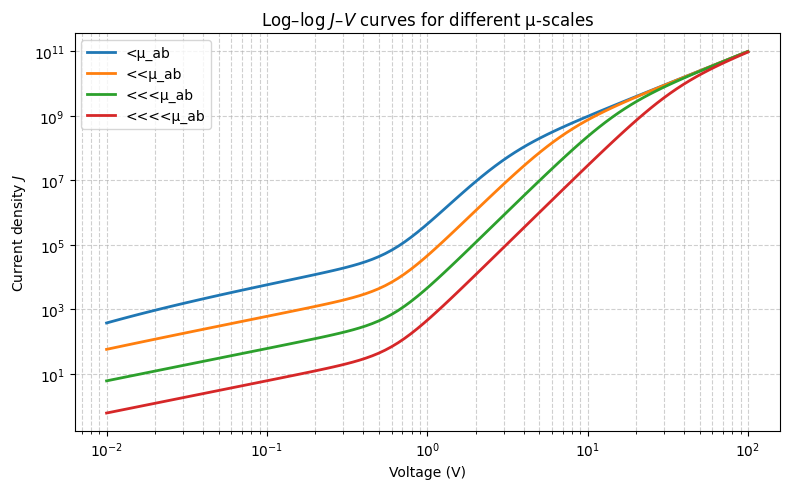

In [ ]:
#@title Sum of J_1, J_2, J_3 for Factors less than Scaling Factor
#@markdown This scaling factor is essentially the differnece in the charge carrier mobility in alpha and beta versus the mobility in gamma. A scaling factor of equal to the point at which all the functions intersect is not possible because of the assumption (?). Instead we plot various functions for factors less than the scaling factor. J_1, J_2, J_3 are summed using: J=1/[(1/(J_1+J_2))+(1/J_3)]
V_tot = np.logspace(-2,2,100)

def J_total_for_scale(scale):
    alpha_scale = (
        np.power(q, 1 - 2*l) * mu * scaling_factor * scale * N_eff *
        np.power((4 * np.pi**2 * epsilon_r * epsilon_0 * k_b * T * q) / N_t, l) /
        np.power(L, 2*l + 1)
    )

    beta_scale = (
        np.power(q, 1 - l) * mu * scaling_factor * scale * N_eff *
        np.power((epsilon_r * epsilon_0 * l) / (N_t * (l + 1)), l) *
        np.power((2*l + 1) / (l + 1), l + 1) /
        np.power(L, 2*l + 1)
    )

    J1 = alpha_scale * V_tot
    J2 = beta_scale  * V_tot**(l + 1)
    J3 = gamma * V_tot**2

    return 1 / (1/(J1 + J2) + 1/J3)

scaling1 = 1e-2
scaling2 = 1e-3
scaling3 = 1e-4
scaling4 = 1e-5
scales = [scaling1, scaling2, scaling3, scaling4]
labels = [r"<μ_ab", r"<<μ_ab", r"<<<μ_ab", r"<<<<μ_ab"]  # legend text

plt.figure(figsize=(8, 5))

for scale, lbl in zip(scales, labels):
    J = J_total_for_scale(scale)
    plt.loglog(V_tot, J, linewidth=2, label=lbl)

    # optional: print the product μ·scale if you still want those printouts
    print(f"{lbl:6s}: μ_eff = {scaling_factor*scale:.1e}")

plt.xlabel("Voltage (V)")
plt.ylabel("Current density $J$")
plt.title("Log–log $J$–$V$ curves for different μ‑scales")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

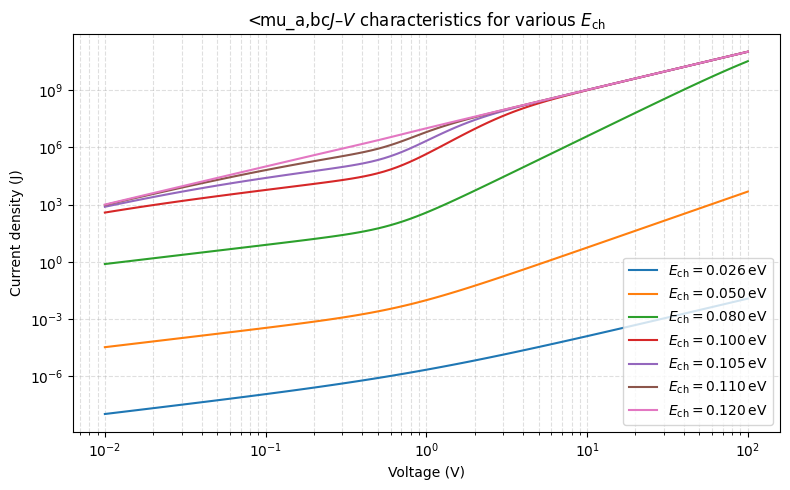

In [ ]:
#@title <mu_a,b varying E_ch
E_ch_list = [k_b * T, 0.05,0.08, 0.10,0.105,0.11, 0.12] # characteristic energies

plt.figure(figsize=(8, 5))

for E_ch in E_ch_list:
    l_new = E_ch / (k_b * T)

    alpha_scaling = (
        np.power(q, 1 - 2*l_new) * mu * scaling_factor * scaling1 * N_eff *
        np.power((4 * np.pi**2 * epsilon_r * epsilon_0 * k_b * T * q) / N_t, l_new) /
        np.power(L, 2*l_new + 1)
    )

    beta_scaling = (
        np.power(q, 1 - l_new) * mu * scaling_factor * scaling1 * N_eff *
        np.power((epsilon_r * epsilon_0 * l_new) / (N_t * (l_new + 1)), l_new) *
        np.power((2*l_new + 1) / (l_new + 1), l_new + 1) /
        np.power(L, 2*l_new + 1)
    )

    J1 = alpha_scaling * V_tot
    J2 = beta_scaling  * V_tot**(l_new + 1)
    J3 = gamma * V_tot**2

    J_total = 1 / (1/(J1 + J2) + 1/J3)

    plt.loglog(V_tot, J_total, label=fr"$E_{{\rm ch}} = {E_ch:.3f}\,$eV")

plt.xlabel(r"Voltage (V)")
plt.ylabel(r"Current density (J)")
plt.title("<mu_a,bc$J$–$V$ characteristics for various $E_{\\rm ch}$")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

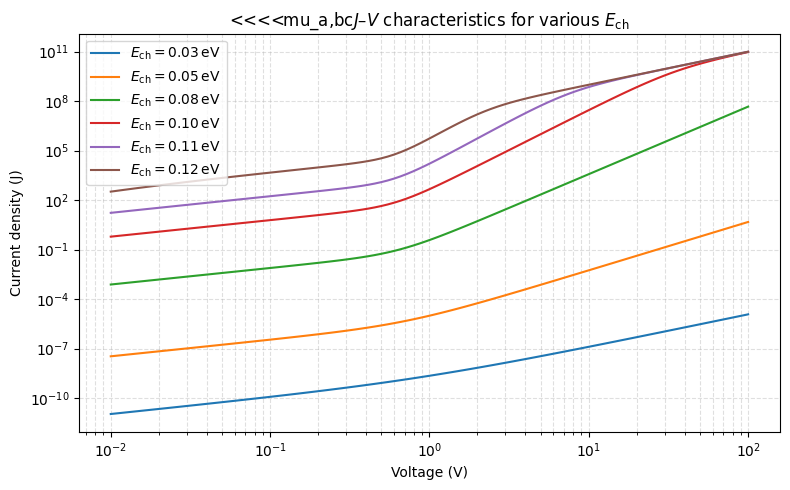

In [ ]:
#@title <<<<mu_a,b varying E_ch
E_ch_list = [k_b * T, 0.05,0.08, 0.10,0.11, 0.12] # characteristic energies

plt.figure(figsize=(8, 5))

for E_ch in E_ch_list:
    l_new = E_ch / (k_b * T)

    alpha_scaling = (
        np.power(q, 1 - 2*l_new) * mu * scaling_factor * scaling4 * N_eff *
        np.power((4 * np.pi**2 * epsilon_r * epsilon_0 * k_b * T * q) / N_t, l_new) /
        np.power(L, 2*l_new + 1)
    )

    beta_scaling = (
        np.power(q, 1 - l_new) * mu * scaling_factor * scaling4 * N_eff *
        np.power((epsilon_r * epsilon_0 * l_new) / (N_t * (l_new + 1)), l_new) *
        np.power((2*l_new + 1) / (l_new + 1), l_new + 1) /
        np.power(L, 2*l_new + 1)
    )

    J1 = alpha_scaling * V_tot
    J2 = beta_scaling  * V_tot**(l_new + 1)
    J3 = gamma * V_tot**2

    J_total = 1 / (1/(J1 + J2) + 1/J3)

    plt.loglog(V_tot, J_total, label=fr"$E_{{\rm ch}} = {E_ch:.2f}\,$eV")

plt.xlabel(r"Voltage (V)")
plt.ylabel(r"Current density (J)")
plt.title("<<<<mu_a,bc$J$–$V$ characteristics for various $E_{\\rm ch}$")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

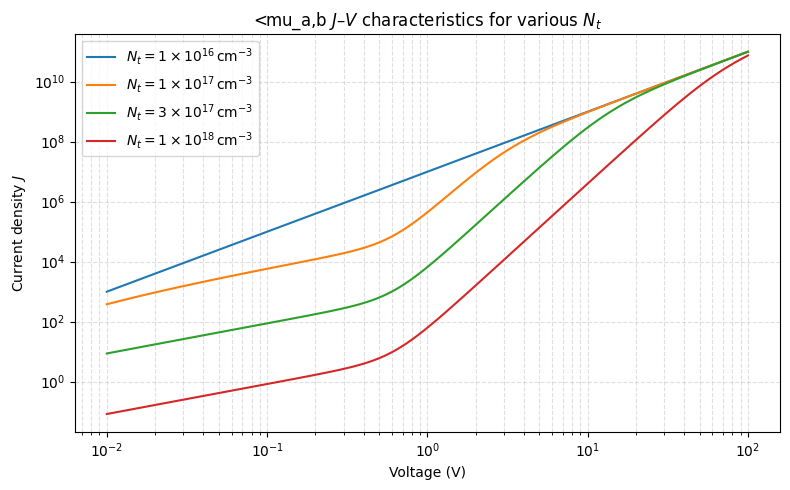

In [ ]:
#@title <mu_a,b varying N_t
N_t_list = [1e16, 1e17, 3e17, 1e18] # Trap Densities

plt.figure(figsize=(8, 5))

for N_t2 in N_t_list:


    alpha_scaling = (
        np.power(q, 1 - 2*l) * mu * scaling_factor * scaling1 * N_eff *
        np.power((4 * np.pi**2 * epsilon_r * epsilon_0 * k_b * T * q) / N_t2, l) /
        np.power(L, 2*l + 1)
    )

    beta_scaling = (
        np.power(q, 1 - l) * mu * scaling_factor * scaling1 * N_eff *
        np.power((epsilon_r * epsilon_0 * l) / (N_t2 * (l + 1)), l) *
        np.power((2*l + 1) / (l + 1), l + 1) /
        np.power(L, 2*l + 1)
    )

    J1 = alpha_scaling * V_tot
    J2 = beta_scaling  * V_tot**(l + 1)
    J3 = gamma * V_tot**2

    J_total = 1 / (1/(J1 + J2) + 1/J3)

    #plt.loglog(V_tot, J_total, label=fr"$N_{{\rm t}} = {N_t:.2f}\,$")
    sci = f"{N_t2:.0e}"          # → '1e16', '3e17', etc.
    base, exp = sci.split("e")   # base='1', exp='+16'
    exp = int(exp)               # to integer

    plt.loglog(
        V_tot,
        J_total,
        label=rf"$N_t = {base} \times 10^{{{exp}}}\,\mathrm{{cm}}^{{-3}}$"
    )

plt.xlabel(r"Voltage (V)")
plt.ylabel(r"Current density $J$")
plt.title(r"<mu_a,b $J$–$V$ characteristics for various $N_t$")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

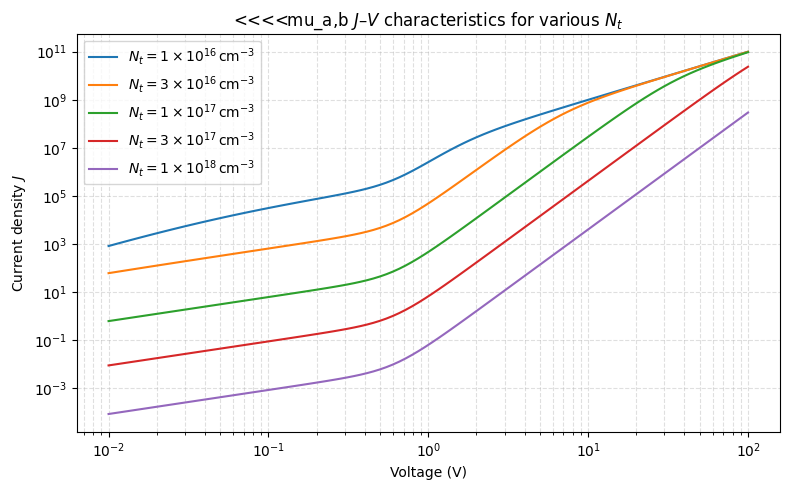

In [ ]:
#@title <<<<mu_a,b varying N_t
N_t_list = [1e16, 3e16, 1e17, 3e17, 1e18] # Trap Densities

plt.figure(figsize=(8, 5))

for N_t2 in N_t_list:


    alpha_scaling = (
        np.power(q, 1 - 2*l) * mu * scaling_factor * scaling4 * N_eff *
        np.power((4 * np.pi**2 * epsilon_r * epsilon_0 * k_b * T * q) / N_t2, l) /
        np.power(L, 2*l + 1)
    )

    beta_scaling = (
        np.power(q, 1 - l) * mu * scaling_factor * scaling4 * N_eff *
        np.power((epsilon_r * epsilon_0 * l) / (N_t2 * (l + 1)), l) *
        np.power((2*l + 1) / (l + 1), l + 1) /
        np.power(L, 2*l + 1)
    )

    J1 = alpha_scaling * V_tot
    J2 = beta_scaling  * V_tot**(l + 1)
    J3 = gamma * V_tot**2

    J_total = 1 / (1/(J1 + J2) + 1/J3)

    #plt.loglog(V_tot, J_total, label=fr"$N_{{\rm t}} = {N_t:.2f}\,$")
    sci = f"{N_t2:.0e}"          # → '1e16', '3e17', etc.
    base, exp = sci.split("e")   # base='1', exp='+16'
    exp = int(exp)               # to integer

    plt.loglog(
        V_tot,
        J_total,
        label=rf"$N_t = {base} \times 10^{{{exp}}}\,\mathrm{{cm}}^{{-3}}$"
    )

plt.xlabel(r"Voltage (V)")
plt.ylabel(r"Current density $J$")
plt.title(r"<<<<mu_a,b $J$–$V$ characteristics for various $N_t$")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

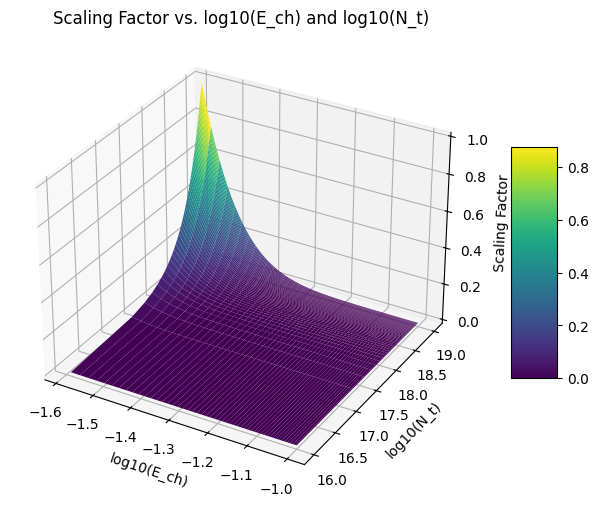

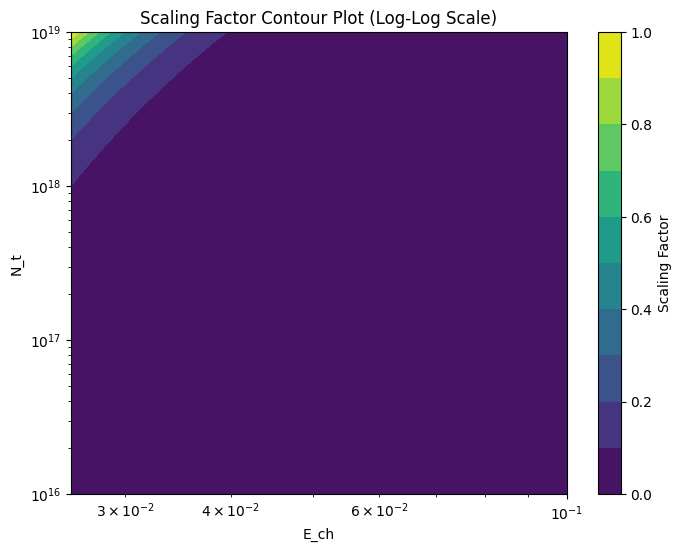

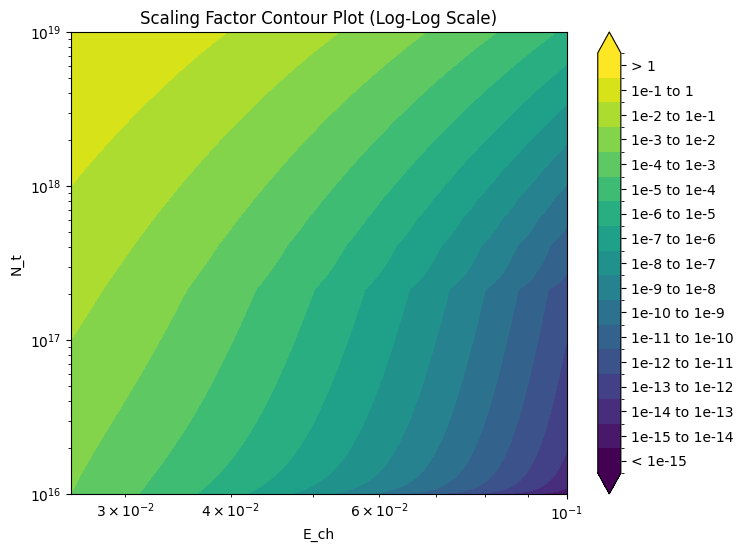

In [ ]:
#@title Contour plots of scaling factor as function of E_ch and N_t
#@markdown Charge carrier mobility in J_1 and J_2 (mu_1,2) is affected by N_t and E_ch. Thus we can create a contour plot of the scaling factor (change in mu_1,2) for varied values of N_t and E_ch.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

# Fundamental Constants
q = 1.60e-19  # C
epsilon_0 = 8.85e-10  # F/cm
k_b = 8.62e-5  # eV/K

# Fixed Parameters
mu = 1  # cm^2/Vs
N_eff = 1e19  # per cm^3
epsilon_r = 10
T = 300  # K
L = 1e-5  # cm
theta = 1

# Define Grid of E_ch and N_t Values
E_ch_values = np.linspace(k_b*T, 0.1, 100)  # Energy levels from 0.001 eV to 0.5 eV
N_t_values = np.linspace(1e16, 1e19, 50)  # Trap densities from 1e16 to 1e19 cm^-3
E_ch_grid, N_t_grid = np.meshgrid(E_ch_values, N_t_values)

# Function Calculating Scaling Factor
def calculated_scaling_factor(E_ch, N_t):
    l = E_ch / (k_b * T)
    alpha = (np.power(q, 1-2*l) * mu * N_eff *
             np.power(((4 * (np.pi**2) * epsilon_r * epsilon_0 * k_b * T * q) / N_t), l) *
             (1/ np.power(L, (2*l + 1))))
    beta = (np.power(q, 1 - l) * mu * N_eff *
            np.power(((epsilon_r * epsilon_0 * l) / (N_t*(l+1))),l) *
            np.power((2*l+1)/(l+1),l+1) * (1/ np.power(L, (2*l + 1))))
    gamma = (9/8) * mu * epsilon_r * epsilon_0 * theta * (1/np.power(L,3))

    scaling_voltage = (alpha / beta) ** (1 / l)
    scaling_factor = (gamma * (scaling_voltage ** 2)) / (beta * (scaling_voltage ** (l + 1)))
    return scaling_factor

# Compute Scaling Factor for Each (E_ch, N_t) Pair
scaling_factor_grid = np.zeros_like(E_ch_grid)
for i in range(E_ch_grid.shape[0]):
    for j in range(E_ch_grid.shape[1]):
        scaling_factor_grid[i, j] = calculated_scaling_factor(E_ch_grid[i, j], N_t_grid[i, j])

# 3D Surface Plot on Log-Log Scale
# transform E_ch and N_t data using log10.
log_E_ch = np.log10(E_ch_grid)
log_N_t = np.log10(N_t_grid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(log_E_ch, log_N_t, scaling_factor_grid, cmap='viridis')
ax.set_xlabel('log10(E_ch)')
ax.set_ylabel('log10(N_t)')
ax.set_zlabel('Scaling Factor')
ax.set_title('Scaling Factor vs. log10(E_ch) and log10(N_t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#Contour Plot on LogLog Scale
plt.figure(figsize=(8, 6))
contour = plt.contourf(E_ch_grid, N_t_grid, scaling_factor_grid, cmap='viridis', levels=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_ch')
plt.ylabel('N_t')
plt.title('Scaling Factor Contour Plot (Log-Log Scale)')
plt.colorbar(label='Scaling Factor')
plt.show()

#Lower and upper bounds of data
lower_bound = 1e-20
upper_bound = 1e2

# Define levels so they are strictly increasing.
levels = [lower_bound, 1e-15, 1e-14, 1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1, 1, upper_bound]

# Discrete colormap of 14 colors
cmap = plt.get_cmap('viridis', len(levels)-1)

# Create a normalization based on these boundaries
norm = colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(E_ch_grid, N_t_grid, scaling_factor_grid,
                       levels=levels, cmap=cmap, norm=norm, extend='both')

# Apply log scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_ch')
plt.ylabel('N_t')
plt.title('Scaling Factor Contour Plot (Log-Log Scale)')

# Set custom tick positions: midpoints of each bin
tick_positions = [0.5*(levels[i] + levels[i+1]) for i in range(len(levels)-1)]
cbar = plt.colorbar(contour, ticks=tick_positions)

# Set the tick labels to show the desired categories.
cbar.ax.set_yticklabels(['< 1e-15', '1e-15 to 1e-14','1e-14 to 1e-13','1e-13 to 1e-12', '1e-12 to 1e-11',
                         '1e-11 to 1e-10','1e-10 to 1e-9','1e-9 to 1e-8','1e-8 to 1e-7','1e-7 to 1e-6',
                         '1e-6 to 1e-5','1e-5 to 1e-4','1e-4 to 1e-3','1e-3 to 1e-2','1e-2 to 1e-1','1e-1 to 1', '> 1'])
plt.show()



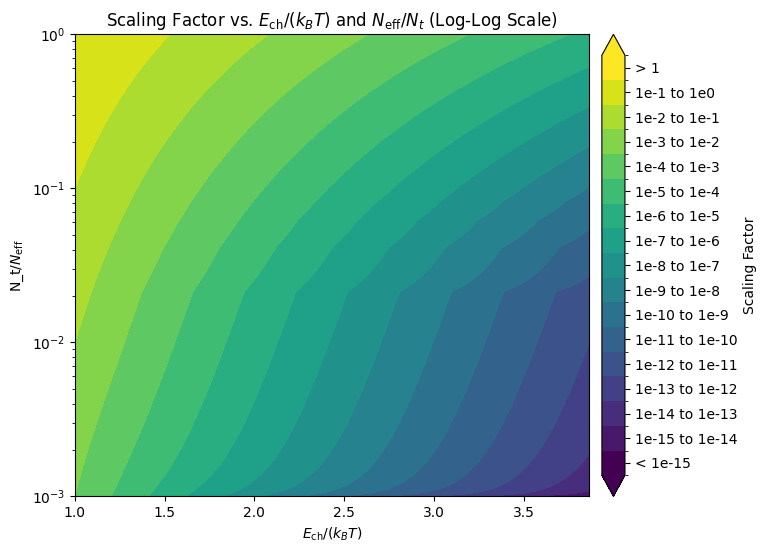

In [ ]:
#@title Contour plot of scaling factor as function of E_ch/(K_b*T) and N_eff/N_t
#@markdown Normalizing the contour plot above.

# Define the new axes
X = E_ch_grid / (k_b * T)      # E_ch / (k_B T)
Y = N_t_grid     / N_eff       # N_eff / N_t

# Discrete colormap of 14 colors
cmap  = plt.get_cmap('viridis', len(levels)-1)

# Create a normalization based on these boundaries
norm  = colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)



# midpoints for colorbar ticks
tick_positions = [0.5*(levels[i] + levels[i+1]) for i in range(len(levels)-1)]
tick_labels = [
    '< 1e-15', '1e-15 to 1e-14', '1e-14 to 1e-13', '1e-13 to 1e-12',
    '1e-12 to 1e-11','1e-11 to 1e-10','1e-10 to 1e-9','1e-9 to 1e-8',
    '1e-8 to 1e-7','1e-7 to 1e-6','1e-6 to 1e-5','1e-5 to 1e-4',
    '1e-4 to 1e-3','1e-3 to 1e-2','1e-2 to 1e-1','1e-1 to 1e0','> 1'
]

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(
    X, Y, scaling_factor_grid,
    levels=levels, cmap=cmap, norm=norm, extend='both'
)

# Apply log scales for both axes
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\rm ch}/(k_B T)$')
plt.ylabel(r'N_t/$N_{\rm eff}$')
plt.title(r'Scaling Factor vs. $E_{\rm ch}/(k_B T)$ and $N_{\rm eff}/N_t$ (Log-Log Scale)')


cbar = plt.colorbar(contour, ticks=tick_positions, pad=0.02)
cbar.ax.set_yticklabels(tick_labels)
cbar.set_label('Scaling Factor')

plt.show()


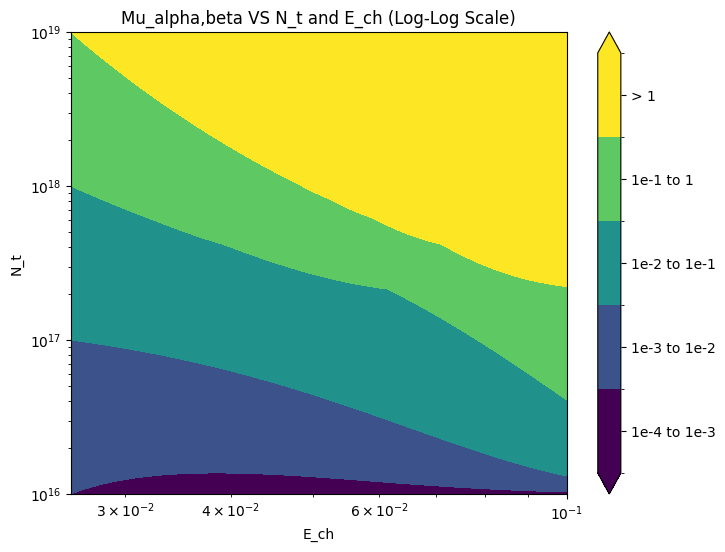

In [ ]:
#@title Contour plots of scaling factor as function of E_ch and N_t
#@markdown Charge carrier mobility in J_1 and J_2 (mu_1,2) is affected by N_t and E_ch. Thus we can create a contour plot of the scaling factor (change in mu_1,2) for varied values of N_t and E_ch.


# Define Grid of E_ch and N_t Values
E_ch_values = np.linspace(k_b*T, 0.1, 100)  # Energy levels from 0.001 eV to 0.5 eV
N_t_values = np.linspace(1e16, 1e19, 50)  # Trap densities from 1e16 to 1e19 cm^-3
E_ch_grid, N_t_grid = np.meshgrid(E_ch_values, N_t_values)

# Function Calculating Scaling Factor
def calculated_scaling_factor(E_ch, N_t):
    l = E_ch / (k_b * T)
    alpha = (np.power(q, 1-2*l) * mu * N_eff *
             np.power(((4 * (np.pi**2) * epsilon_r * epsilon_0 * k_b * T * q) / N_t), l) *
             (1/ np.power(L, (2*l + 1))))
    beta = (np.power(q, 1 - l) * mu * N_eff *
            np.power(((epsilon_r * epsilon_0 * l) / (N_t*(l+1))),l) *
            np.power((2*l+1)/(l+1),l+1) * (1/ np.power(L, (2*l + 1))))
    gamma = (9/8) * mu * epsilon_r * epsilon_0 * theta * (1/np.power(L,3))

    scaling_voltage = (alpha / beta) ** (1 / l) * scaling3
    scaling_factor = (gamma * (scaling_voltage ** 2)) / (beta * (scaling_voltage ** (l + 1)))
    return scaling_factor

# Compute Scaling Factor for Each (E_ch, N_t) Pair
scaling_factor_grid = np.zeros_like(E_ch_grid)
for i in range(E_ch_grid.shape[0]):
    for j in range(E_ch_grid.shape[1]):
        scaling_factor_grid[i, j] = calculated_scaling_factor(E_ch_grid[i, j], N_t_grid[i, j])

#Lower and upper bounds of data
lower_bound = 1e-4
upper_bound = 1e2

# Define levels so they are strictly increasing.
levels = [lower_bound, 1e-3,1e-2,1e-1, 1, upper_bound]

# Discrete colormap of 14 colors
cmap = plt.get_cmap('viridis', len(levels)-1)

# Create a normalization based on these boundaries
norm = colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(E_ch_grid, N_t_grid, scaling_factor_grid,
                       levels=levels, cmap=cmap, norm=norm, extend='both')

# Apply log scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_ch')
plt.ylabel('N_t')
plt.title('Mu_alpha,beta VS N_t and E_ch (Log-Log Scale)')

# Set custom tick positions: midpoints of each bin
tick_positions = [0.5*(levels[i] + levels[i+1]) for i in range(len(levels)-1)]
cbar = plt.colorbar(contour, ticks=tick_positions)

# Set the tick labels to show the desired categories.
cbar.ax.set_yticklabels(['1e-4 to 1e-3','1e-3 to 1e-2','1e-2 to 1e-1','1e-1 to 1', '> 1'])
plt.show()